# Import

The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
#!pip install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [103]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_theme()

import sklearn
import scipy

# from scipy.stats import boxcox
# from scipy.stats.mstats import normaltest

# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score 
# from sklearn.metrics import mean_squared_error

# from sklearn.pipeline import Pipeline


In [97]:
# The function that computes the normaltest and returns the p-value with specified precision
def normaltest_p_value(data, precision=6):
    _, p = scipy.stats.normaltest(data)
    if precision is None:
        return p
    return float(p.round(precision))

# Data management

## Reading and understanding our data

For this lab, we will be using the car sales dataset, hosted on IBM Cloud object storage. This dataset can also be found and downloaded from [kaggle.com](https://www.kaggle.com/datasets/goyalshalini93/car-data), an open public data source.
The dataset contains all the information about cars, a name of a manufacturer, all car's technical parameters and a sale price of a car.


Let's read the data into *pandas* data frame and look at the first 5 rows using the `head()` method.


In [2]:
# data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/CarPrice_Assignment.csv')
filename = 'data/CarPrice_Assignment.csv'
data = pd.read_csv(filename)
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


We can find more information about the features and types using the `info()`  method.


In [3]:
data.shape

(205, 26)

According to the output above, we have 205 entries or rows, as well as 26 features. The "Non-Null Count" column shows the number of non-null entries.  If the count is 205 then there is no missing values for that particular feature. The 'price' is our target, or response variable, and the rest of the features are our predictor variables.

We also have a mix of numerical (8 int64 and 8 float64) and object data types (10 object). 

The `describe()` function will provide the statistical information about all numeric values.


In [ ]:
# data.describe()

## Data Cleaning and Wrangling


Here, we will check if we have any missing values.


In [7]:
data.isnull().sum().sort_values(ascending=False)[:5]

car_ID        0
symboling     0
highwaympg    0
citympg       0
peakrpm       0
dtype: int64

Also, check for any duplicates by running `duplicated()` function through 'car_ID' records, since each row has a unique car ID value.


In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.duplicated(subset='car_ID').sum()

np.int64(0)

In [ ]:
# sum(data.duplicated(subset = 'car_ID')) == 0

Next, let's look into some of our object variables first. Using `unique()` function, we will describe all categories of the 'CarName' attribute.


In [13]:
data["CarName"].unique().shape, data["CarName"].unique()[:5]

((147,),
 array(['alfa-romero giulia', 'alfa-romero stelvio',
        'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls'],
       dtype=object))

We can see that the 'CarName' includes both the company name (brand) and the car model. Next, we want to split a company name from the model of a car, as for our model building purpose, we will focus on a company name only. 


In [22]:
data['brand'] = data.CarName.str.split(' ').str.get(0).str.lower()

Let's view all the `unique()` brands now.


In [24]:
data.brand.unique().shape, data.brand.unique()[:5]

((27,),
 array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge'], dtype=object))

In [25]:
data.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There are some typos in the names of the cars, so they should be corrected.


In [26]:
data['brand'] = data['brand'].replace(['vw', 'vokswagen'], 'volkswagen')
data['brand'] = data['brand'].replace(['maxda'], 'mazda')
data['brand'] = data['brand'].replace(['porcshce'], 'porsche')
data['brand'] = data['brand'].replace(['toyouta'], 'toyota')

In [27]:
data.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Let's plot and sort the total number of Brands.


/var/folders/5r/36v862y17991gp14kn_1mn_40000gn/T/ipykernel_59121/935419327.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  plt1 = sns.countplot(data['brand'], order=pd.value_counts(data['brand']).index,)


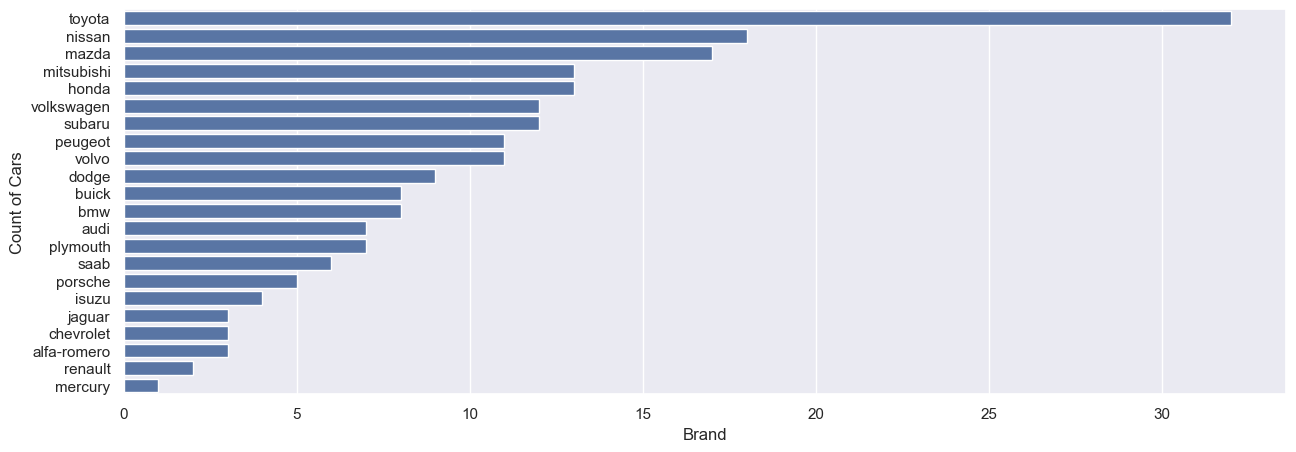

<Figure size 640x480 with 0 Axes>

In [29]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(data['brand'], order=pd.value_counts(data['brand']).index,)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
plt.show()
plt.tight_layout();

We can drop 'car_ID', 'symboling', and 'CarName' from our data frame, since they will no longer be needed.


In [30]:
data.drop(['car_ID', 'symboling', 'CarName'],axis = 1, inplace = True)

In [32]:
#If you need to save this partially processed data, uncomment the line below.
data.to_csv('data/cleaned_car_data.csv', index=False)
filename_cleaned = 'data/cleaned_car_data.csv'

### Exercise 1
In this exercise, explore any (or all) object variables of your interest.


In [33]:
# Enter your code and run the cell
data.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'brand'],
      dtype='object')

In [36]:
data['fueltype'].unique(), data['fueltype'].value_counts()

(array(['gas', 'diesel'], dtype=object),
 fueltype
 gas       185
 diesel     20
 Name: count, dtype: int64)

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
```python
data.fueltype.unique()
data["enginelocation"].value_counts()
```
</details>


Next, we need to engineer some features, for better visualizations and analysis. We will group our data by 'brand', calculate the average price for each brand, and split these prices into 3 bins: 'Budget', 'Mid-Range', and 'Luxury' cars, naming the newly created column - the 'brand_category'. 


In [39]:
data.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'brand'],
      dtype='object')

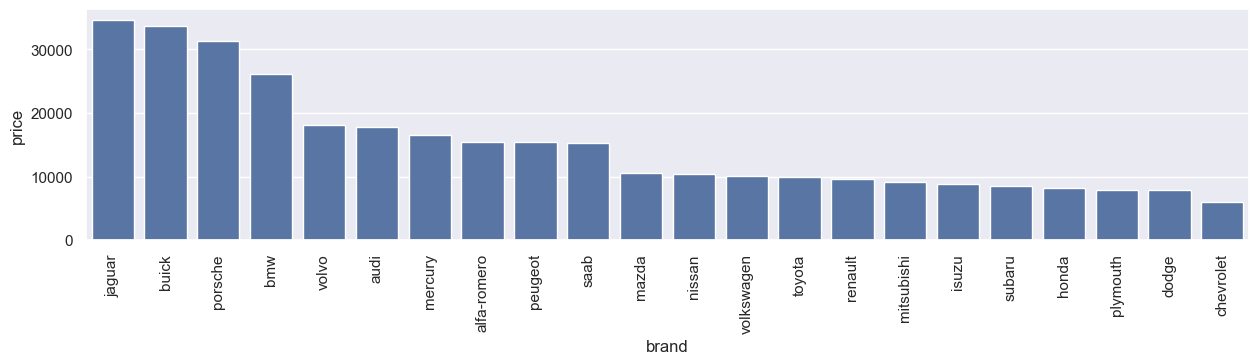

In [ ]:
# Compute the mean price of cars for each brand and plot the results
price_per_brand = data.groupby('brand')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,3))
sns.barplot(x=price_per_brand.index, y=price_per_brand)
# Rotate x-axis labels to vertical
plt.xticks(rotation=90);

In [50]:
# Let's create 3 categories of cars based on price: 1. Budget < 11K, 2. Mid_Range 11K-20K, 3. Luxury > 20K
# Create a new column 'brand_category' and assign the category based on the price of the car
data['brand_category'] = pd.cut(data['price'], bins=[0, 11000, 20000, 50000], labels=['Budget', 'Mid_Range', 'Luxury'])

In [52]:
data['brand_category'].unique()

['Mid_Range', 'Luxury', 'Budget']
Categories (3, object): ['Budget' < 'Mid_Range' < 'Luxury']

In [53]:
data.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,brand_category
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,Mid_Range
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,Mid_Range
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Mid_Range
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,Mid_Range
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,Mid_Range


In [ ]:
# data_comp_avg_price = data[['brand','price']].groupby('brand', as_index = False).mean().rename(columns={'price':'brand_avg_price'})


In [ ]:
# data = data.merge(data_comp_avg_price, on = 'brand')

We will now check the statistics of our average car price per car brand.


In [ ]:
# data.brand_avg_price.describe()

In [ ]:
# data['brand_category'] = data['brand_avg_price'].apply(lambda x : "Budget" if x < 10000 
                                                #      else ("Mid_Range" if 10000 <= x < 20000
                                                #            else "Luxury"))

## Exploratory Data Analysis


List of Categorical Variables:
- brand_category
- fueltype
- enginetype
- carbody
- doornumber
- enginelocation
- fuelsystem
- cylindernumber
- aspiration
- drivewheel

We will use the `boxplot()` function on the above mentioned categorical variables, to display the mean, variance, and possible outliers, with respect to the price.

In [ ]:
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = data)
plt.subplot(4,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = data)
plt.subplot(4,2,3)
sns.boxplot(x = 'carbody', y = 'price', data = data)
plt.subplot(4,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = data)
plt.subplot(4,2,5)
sns.boxplot(x = 'enginetype', y = 'price', data = data)
plt.subplot(4,2,6)
sns.boxplot(x = 'brand_category', y = 'price', data = data)
plt.tight_layout()
plt.show()

Next, let's view the list of top features that have high correlation coefficient. The `corr()` function calculates the Pearson'r correlation coefficients with respect to the 'price'.


In [54]:
corr_matrix = data.corr(numeric_only=True)

In [56]:
corr_matrix.shape, type(corr_matrix)

((14, 14), pandas.core.frame.DataFrame)

In [58]:
corr_matrix['price'].sort_values(ascending=False)

price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

These are strongly correlated numerical features with Car Price.


We can also use the `heatmap()` or `pairplot()` to further explore the relationship between all features and the target variables.


### Exercise 2 
Use the `pairplot()` function to display the scatter plots of the relationships between the features.


In [ ]:
# Enter your code and run the cell
sns.pairplot(data)
plt.show()

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
```python


sns.pairplot(data)
plt.show()   
    
    
```
</details>


# Testing Assumptions

Since we fit a linear model, we assume that the relationship between the target (price) and other features is linear. 

We also expect that the errors, or residuals, are pure random fluctuations around the true line, in other words, the variability in the response (dependent) variable doesn't increase as the value of the predictor (independent) variable increases. This is the assumption of equal variance, also known as *Homoscedasticity*. 

We also assume that the observations are independent of one another (no *multicollinearity*), and there is no correlation between the sequential observations.

If we see one of these assumptions in the dataset are not met, it's more likely that the other ones, mentioned above, will also be violated. Luckily, we can check and fix these assumptions with a few unique techniques.

Now, let's briefly touch upon each of these assumptions in our example.

### 1. Linearity Assumption

Linear regression needs the relationship between independent variable and the dependent variable to be linear. We can test this assumption with some scatter plots and regression lines. 

We will start with the 'enginesize' and 'horsepower' features.


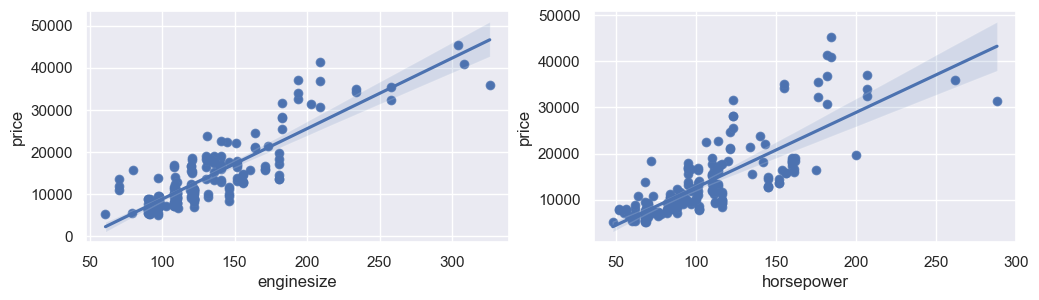

In [60]:
fig, (ax1, ax2) = plt.subplots(figsize = (12,3), ncols=2,sharey=False)
sns.scatterplot( x = data.enginesize, y = data.price,  ax=ax1)
sns.regplot(x=data.enginesize, y=data.price, ax=ax1)
 
sns.scatterplot(x = data.horsepower,y = data.price, ax=ax2)
sns.regplot(x=data.horsepower, y=data.price, ax=ax2);


#### Exercise 3
In this Exercise, plot any other numeric features, using the *seaborn* `regplot()` function, to see whether there is any linear relationship between the feature and the 'price'.


In [79]:
data.dtypes[data.dtypes == 'float64']

wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
boreratio           float64
stroke              float64
compressionratio    float64
price               float64
dtype: object

In [83]:
def plot_features(features):
    ncols = len(features)
    fig, axs = plt.subplots(figsize = (12,3), ncols=ncols, sharey=False)

    for i, feature in enumerate(features):
        sns.scatterplot(x = data[feature], y = data.price, ax=axs[i])
        sns.regplot(x=data[feature], y=data.price, ax=axs[i])
        axs[i].set_title(f'Price vs {feature}')
    plt.tight_layout();


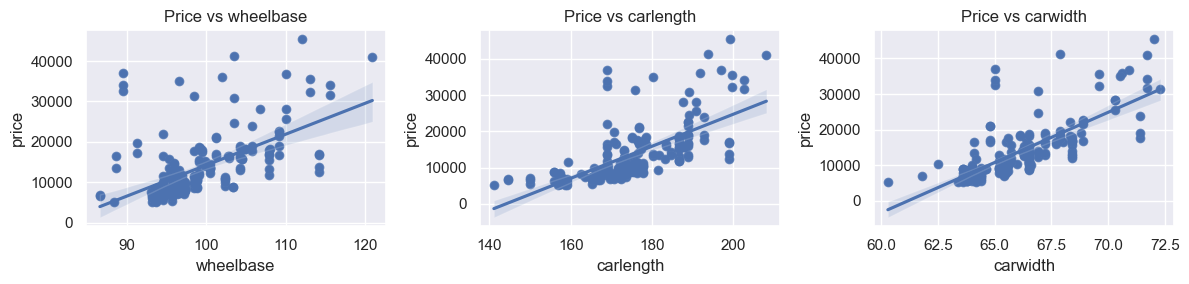

In [84]:
features = ['wheelbase', 'carlength', 'carwidth']
plot_features(features)

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
```python
sns.regplot(x=data.curbweight, y=data.price, data=data)
    
```
</details>


### 2. Homoscedasticity

The assumption of *homoscedasticity* (constant variance), is crucial to linear regression models. *Homoscedasticity* describes a situation in which the error term or variance or the "noise" or random disturbance in the relationship between the independent variables and the dependent variable is the same across all values of the independent variable. In other words, there is a constant variance present in the response variable as the predictor variable increases. If the "noise" is not the same across the values of an independent variable, we call it *heteroscedasticity*, opposite of *homoscedasticity*. 


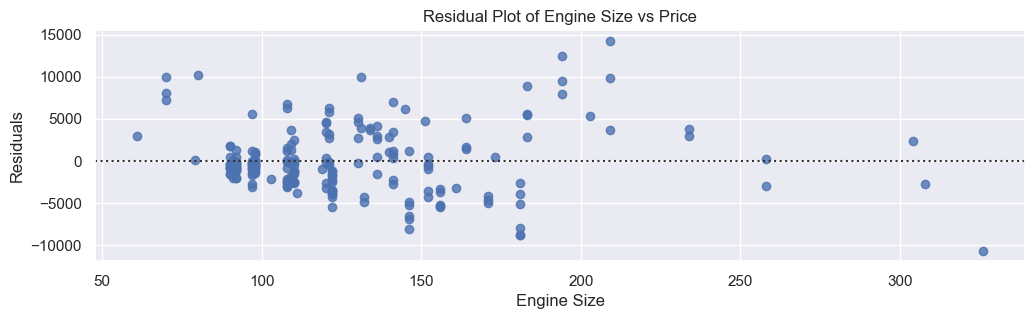

In [87]:
# Create a figure with specified size
plt.figure(figsize=(12, 3))

# Use keyword arguments for x and y
sns.residplot(x='enginesize', y='price', data=data)

# Add labels and title
plt.xlabel('Engine Size')
plt.ylabel('Residuals')
plt.title('Residual Plot of Engine Size vs Price')

# Show plot
plt.show()

From the above plot, we can tell the error variance across the true line is dispersed somewhat not uniformly, but in a funnel like shape. So, the assumption of the *homoscedasticity* is more likely not met.


### 3. Normality
The linear regression analysis requires the dependent variable, 'price', to be normally distributed. A histogram, box plot, or a Q-Q-Plot can check if the target variable is normally distributed. The goodness of fit test, e.g., the Kolmogorov-Smirnov test can check for normality in the dependent variable. [This documentation](https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411) contains more information on the normality assumption. 

Let's display all three charts to show how our target variable, 'price' behaves.


In [88]:
def plotting_3_chart(data, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(data.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(data.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(data.loc[:,feature], orient='v', ax = ax3);

/var/folders/5r/36v862y17991gp14kn_1mn_40000gn/T/ipykernel_59121/2925602279.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[:,feature], norm_hist=True, ax = ax1)


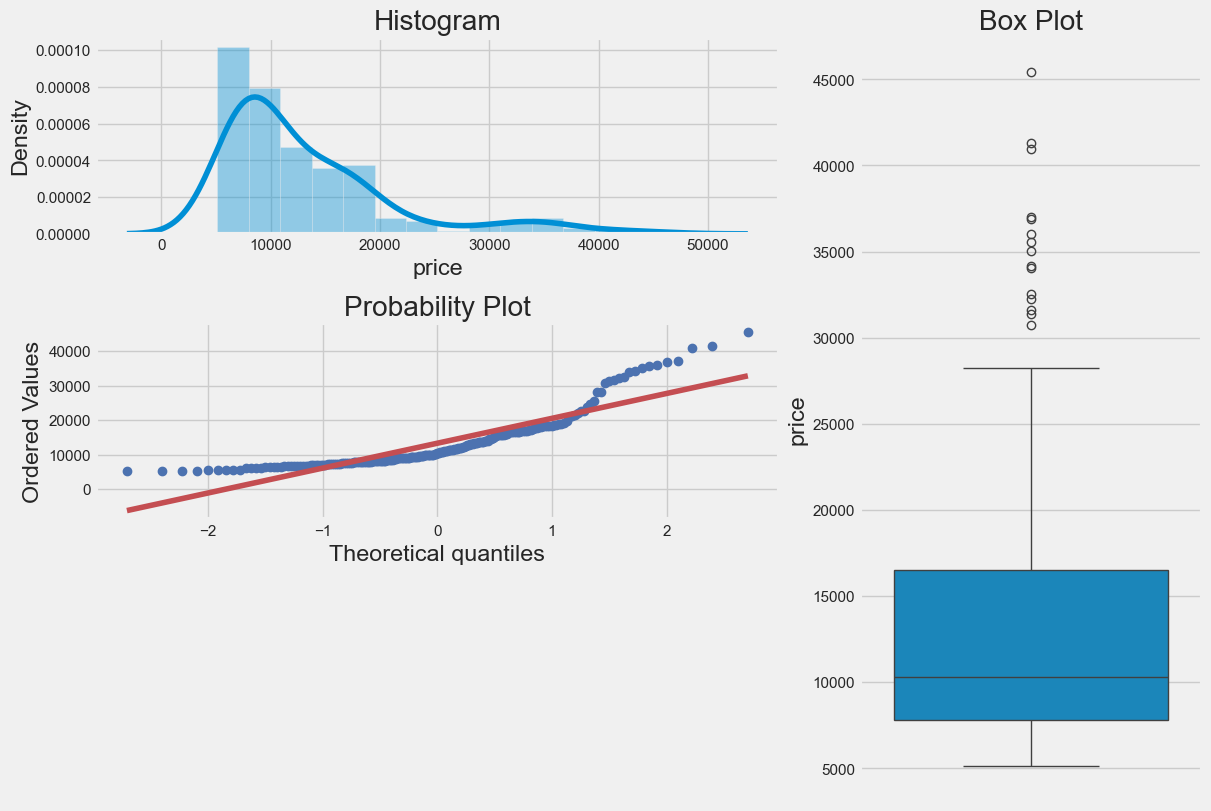

In [90]:
plotting_3_chart(data, 'price');

These three charts above can tell us a lot about our target variable:

- Our target variable, 'price' is not normally distributed
- Our target variable is right-skewed
- There are some outliers in the variable

The right-skewed plot means that most prices in the dataset are on the lower end (below 15,000). The 'max' value is very far from the '75%' quantile statistic. All these plots show that the assumption for accurate linear regression modeling is not met. 

Next, we will perform the log transformation to correct our target variable and to make it more normally distributed. 

But first, we will save our data that we have changed so far, in the 'previous_data' frame.


In [91]:
previous_data = data.copy()

#### Log Transformation


We can also check statistically if the target is normally distributed, using `normaltest()` function. If the p-value is large (>0.05), the target variable is normally distributed.


In [99]:
# normaltest(data.price.values)
normaltest_p_value(data.price.values, precision=None)

np.float64(1.5783445016767577e-17)

As we can see, the p-value is very small, so it is not normally distributed.


Now, we can try to transform our data, so it looks more normally distributed. We can use the `np.log()` or `np.log1p`functions from the `numpy` library to perform the log transformation. The `np.log1p` works better with smaller numbers and thus provides more accurate results. This [documentation](https://numpy.org/doc/stable/reference/generated/numpy.log.html) contains more information about the numpy log transform.


In [100]:
data['price'] = np.log(data['price'])
# plotting_3_chart(data, 'price')

<Figure size 1000x300 with 0 Axes>

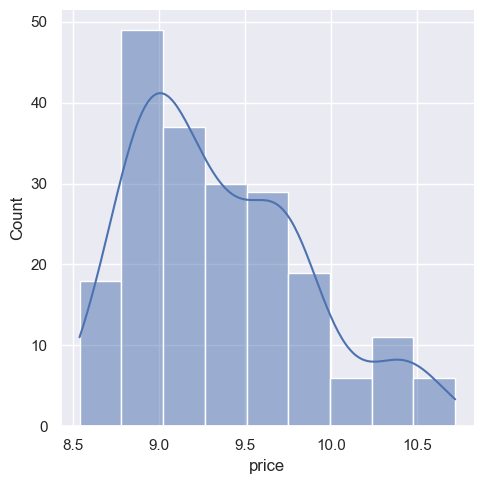

In [107]:
# Plot data['price'] after applying the log transformation using seaborn displot
plt.figure(figsize=(10, 3))
sns.displot(data['price'], kde=True);

Let's check our p-value, after the transformation. 


In [108]:
normaltest_p_value(data.price.values, precision=6)

0.000866

As we can see, the log method transformed the car 'price' distribution into a more symmetrical bell curve. It is still not perfect, but it is much closer to being normally distributed.

There are other ways to correct the skewed data. For example, Square Root Transform (`np.sqrt`) and the Box-Cox Transform (`stats.boxcox` from the `scipy stats` library). To learn more about these two methods, please check out this [article](https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45).


#### Exercise 4 
Use the `boxcox()` function to do another transformation on the original, untransformed data (previous_data). Use the `normaltest()` function to check for statistics. 


In [109]:
# Use boxcox to transform the price column
data['price'], lambda_ = scipy.stats.boxcox(data['price'])

<Figure size 1000x300 with 0 Axes>

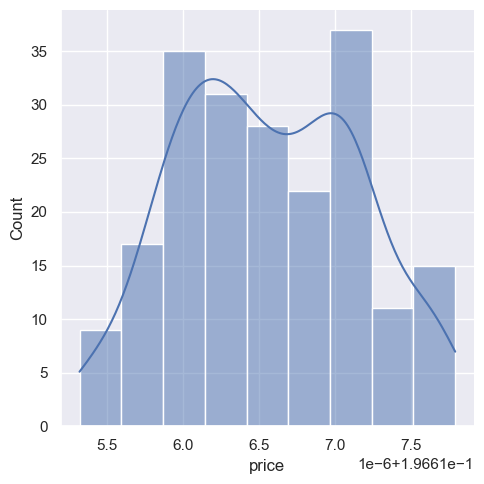

In [112]:
plt.figure(figsize=(10, 3b))
sns.displot(data['price'], kde=True);

In [113]:
normaltest_p_value(data.price.values, precision=6)

0.000401

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
```python
cp_result = boxcox(previous_data.price)
boxcox_price = cp_result[0]

    
normaltest(boxcox_price)
    
```
</details>


<details>
<summary><strong>Answer</strong> (Click Here)</summary>
```python
The higher the p-value is, the closer the distribution is to normal. In our case, pvalue=0.0.00023321005129893173, is very small, (<0.05), so the target variable is still not normally distributed).
    
```
</details>


### 4. *Multicollinearity*

*Multicollinearity* is when there is a strong correlation between the independent variables. Linear regression or multilinear regression requires independent variables to have little or no similar features. *Multicollinearity* can lead to a variety of problems, including:
- The effect of predictor variables estimated by our regression will depend on what other variables are included in our model.
- Predictors can have widely different results depending on the observations in our sample, and small changes in samples can   result in very different estimated effects.
- With very high multicollinearity, the inverse matrix, the computer calculations may not be accurate.
- We can no longer interpret a coefficient on a variable because there is no scenario in which one variable can change without a conditional change in another variable.

Using `heatmap()` function is an excellent way to identify whether there is *multicollinearity* present or not. The best way to solve for *multicollinearity* is to use the regularization methods like *Ridge* or *Lasso*, which we will introduce in the **Regularization** lab.


#### Exercise 5
Use the `heatmap()` do display all correlation factors of the numeric variables. Do you see any correlations between the independent features?


In [ ]:
# Enter your code and run the cell


<details>
<summary><strong>Solution</strong> (Click Here)</summary>
```python

num = data.select_dtypes(include = ['int64', 'float64'])
plt.figure(figsize = (30, 25))
sns.heatmap(num.corr(), annot = True, cmap="YlGnBu")
plt.show()   
    
    
```
</details>


<details>
<summary><strong>Answer</strong> (Click Here)</summary>
```python

Observation.
As we can see, the multicollinearity still exists in various features. However, we will keep them for now for the sake of learning and let the models (e.x. Regularization models such as Lasso, Ridge in the next lab) do the clean up later on.
    
    
```
</details>


# More Data Management


## Extracting Features

List of significant variables after Exploratory Data Analysis :

Numerical:

- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- City mpg (miles per gallon)
- Highway mpg (miles per gallon)

Categorical:

- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Brand Category


We are going to put all the selected features into a data frame.


In [114]:
columns=['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase', 'brand_category',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'carlength','carwidth','citympg','highwaympg']



selected = data[columns]

In [115]:
selected.shape

(205, 17)

We can find the categorical columns by  iterating  through the ```dtypes```  attribute.


In [120]:
list(selected.dtypes.items())

[('price', dtype('float64')),
 ('fueltype', dtype('O')),
 ('aspiration', dtype('O')),
 ('carbody', dtype('O')),
 ('drivewheel', dtype('O')),
 ('wheelbase', dtype('float64')),
 ('brand_category',
  CategoricalDtype(categories=['Budget', 'Mid_Range', 'Luxury'], ordered=True, categories_dtype=object)),
 ('curbweight', dtype('int64')),
 ('enginetype', dtype('O')),
 ('cylindernumber', dtype('O')),
 ('enginesize', dtype('int64')),
 ('boreratio', dtype('float64')),
 ('horsepower', dtype('int64')),
 ('carlength', dtype('float64')),
 ('carwidth', dtype('float64')),
 ('citympg', dtype('int64')),
 ('highwaympg', dtype('int64'))]

In [132]:
values = [value for key, value in selected.dtypes.items()]
v = values[0]
type(v), v == 'float64', v in ['float64', 'int64'], v == np.float64

(numpy.dtypes.Float64DType, True, True, True)

In [117]:
categorical_columns=[key for key, value in selected.dtypes.items()  if value=='O']
categorical_columns

['fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginetype',
 'cylindernumber']

### Exercise 6 
Find the names of the  numeric columns using the list ```columns``` and assign them to the list  ```numeric_columns```.


In [121]:
numeric_types = ['int64', 'float64']
numeric_columns = [key for key, value in selected.dtypes.items() if value in numeric_types]

In [123]:
numeric_columns

['price',
 'wheelbase',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'carlength',
 'carwidth',
 'citympg',
 'highwaympg']

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
```python

numeric_columns=list(set(columns)-set(categorical_columns))
numeric_columns
    
```
</details>


We can split the data into the features ```X``` and target ```y```.


In [133]:
selected.shape

(205, 17)

In [134]:
X = selected.drop("price", axis=1)
X.shape

(205, 16)

In [135]:
y = selected["price"].copy()
y.shape

(205,)

Before we used one-hot encoding to deal with the categorical data, let's examine the distribution of the categorical variables:


In [137]:
# Create a dictionary with value counts for categorical columns
value_counts = {col: selected[col].value_counts().to_dict() for col in categorical_columns}
value_counts

{'fueltype': {'gas': 185, 'diesel': 20},
 'aspiration': {'std': 168, 'turbo': 37},
 'carbody': {'sedan': 96,
  'hatchback': 70,
  'wagon': 25,
  'hardtop': 8,
  'convertible': 6},
 'drivewheel': {'fwd': 120, 'rwd': 76, '4wd': 9},
 'enginetype': {'ohc': 148,
  'ohcf': 15,
  'ohcv': 13,
  'dohc': 12,
  'l': 12,
  'rotor': 4,
  'dohcv': 1},
 'cylindernumber': {'four': 159,
  'six': 24,
  'five': 11,
  'eight': 5,
  'two': 4,
  'three': 1,
  'twelve': 1}}

In [ ]:
# for column in  categorical_columns:
#     print("column name:", column)
#     print("value_count:")
#     print( X[column].value_counts())

We see many categorical features have few or one occurrence. For example, we see ```three```, ```twelve``` only occur once in the column ```cylindernumber```. Therefore, if the components for the one-hot encoding are constructed using the training data, and the sample in the column ```cylindernumber``` does not include three or twelve, we will get an error. As a result, we must split the data before the transformation.   This is fine as one-hot encoding is a deterministic transform, but for other transforms, for example standardization, the parameters should be estimated using the training data, then applied to the test data.


## OneHotEncoder


We will use the following modules:


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

To perform one-hot encoding, we use the ```ColumnTransformer``` class, this allows different columns or column subsets to be transformed separately. 

The input is as follows:

The `transformerslist` is the number of tuples.
The list of `(name, transformer, columns)` tuples specify the transformer objects to be applied to the subsets of the data.

*   name: name of the operation that can be used later 
*  `transformer`: estimator must support fit and transform, in this case we will use `OneHotEncoder()`
*  `‘drop’`: to  drop the columns 
*  `‘passthrough’`: to pass them through untransformed data
*  `remainder`: specifies the columns that are not transformed are being set to `passthrough`. They are  combined in the output, and the non-specified columns are dropped.


We apply ```fit_transform()``` to transform the data.


In [138]:
one_hot = sklearn.compose.ColumnTransformer(
    transformers=[("one_hot", sklearn.preprocessing.OneHotEncoder(), categorical_columns) ],
    remainder="passthrough")

In [139]:
X = one_hot.fit_transform(X)
type(X)

numpy.ndarray

In [ ]:
# !pip install --upgrade scikit-learn


We see the output is a NumPy array, so let's get the feature names from the ```one_hot``` object using  ```get_feature_names_out()``` method. The output  will be the feature name with the  prefix of the name of the transformer. For one-hot encoding, the prefix will also include the name of the column that generated that feature. 


In [140]:
names = one_hot.get_feature_names_out()
names

array(['one_hot__fueltype_diesel', 'one_hot__fueltype_gas',
       'one_hot__aspiration_std', 'one_hot__aspiration_turbo',
       'one_hot__carbody_convertible', 'one_hot__carbody_hardtop',
       'one_hot__carbody_hatchback', 'one_hot__carbody_sedan',
       'one_hot__carbody_wagon', 'one_hot__drivewheel_4wd',
       'one_hot__drivewheel_fwd', 'one_hot__drivewheel_rwd',
       'one_hot__enginetype_dohc', 'one_hot__enginetype_dohcv',
       'one_hot__enginetype_l', 'one_hot__enginetype_ohc',
       'one_hot__enginetype_ohcf', 'one_hot__enginetype_ohcv',
       'one_hot__enginetype_rotor', 'one_hot__cylindernumber_eight',
       'one_hot__cylindernumber_five', 'one_hot__cylindernumber_four',
       'one_hot__cylindernumber_six', 'one_hot__cylindernumber_three',
       'one_hot__cylindernumber_twelve', 'one_hot__cylindernumber_two',
       'remainder__wheelbase', 'remainder__brand_category',
       'remainder__curbweight', 'remainder__enginesize',
       'remainder__boreratio', 'remainde

Let's strip out the prefix of the string. 


In [141]:
colunm_names=[name[name.find("_")+1:] for name in  [name[name.find("__")+2:] for name in names]]
colunm_names

['diesel',
 'gas',
 'std',
 'turbo',
 'convertible',
 'hardtop',
 'hatchback',
 'sedan',
 'wagon',
 '4wd',
 'fwd',
 'rwd',
 'dohc',
 'dohcv',
 'l',
 'ohc',
 'ohcf',
 'ohcv',
 'rotor',
 'eight',
 'five',
 'four',
 'six',
 'three',
 'twelve',
 'two',
 'wheelbase',
 'category',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'carlength',
 'carwidth',
 'citympg',
 'highwaympg']

We can save the result as a dataframe to be used in other labs. 


In [142]:
df = pd.DataFrame(data=X, columns=colunm_names)
df.to_csv('data/cleaned_car_data_v2.csv', index=False)

#### Exercise 7
Write the lines of code  that performs same task as  ``ColumnTransformer`` using ``OneHotEncoder()``.


In [146]:
selected.shape, len(categorical_columns), len(numeric_columns)

(205, 16)

In [147]:
X_ = selected.drop("price", axis=1)
X_.shape

(205, 16)

In [162]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming `X_` is your DataFrame and `categorical_columns` contains the names of categorical columns
categorical_columns = [key for key, value in X_.dtypes.items() if value == 'O']

# Initialize OneHotEncoder
one_hot = OneHotEncoder(drop='first')  # drop='first' to avoid multicollinearity

# Fit and transform only the categorical columns
X_categorical = one_hot.fit_transform(X_[categorical_columns])

# Convert the result to a DataFrame with appropriate column names
X_categorical_df = pd.DataFrame(X_categorical)

# Drop the original categorical columns from X_ and concatenate the new one-hot encoded columns
X_ = X_.drop(columns=categorical_columns)
X_ = pd.concat([X_, X_categorical_df], axis=1)

# Display the transformed DataFrame
print(X_.head())

   wheelbase brand_category  curbweight  enginesize  boreratio  horsepower  \
0       88.6      Mid_Range        2548         130       3.47         111   
1       88.6      Mid_Range        2548         130       3.47         111   
2       94.5      Mid_Range        2823         152       2.68         154   
3       99.8      Mid_Range        2337         109       3.19         102   
4       99.4      Mid_Range        2824         136       3.19         115   

   carlength  carwidth  citympg  highwaympg  \
0      168.8      64.1       21          27   
1      168.8      64.1       21          27   
2      171.2      65.5       19          26   
3      176.6      66.2       24          30   
4      176.6      66.4       18          22   

                                                   0  
0  <Compressed Sparse Row sparse matrix of dtype ...  
1  <Compressed Sparse Row sparse matrix of dtype ...  
2  <Compressed Sparse Row sparse matrix of dtype ...  
3  <Compressed Sparse Row sp

In [152]:
type(X_categorical), X_categorical.shape

(scipy.sparse._csr.csr_matrix, (205, 20))



<details>
<summary><strong>Solution</strong> (Click Here)</summary>
```python

X_ = selected[categorical_columns+numeric_columns]


X_numeric=X_[numeric_columns].to_numpy()
X_categorical=OneHotEncoder().fit_transform(X_[categorical_columns]).toarray()
X_=np.concatenate((X_categorical,X_numeric), axis = 1)

```
</details>


#### Exercise 8
Write the lines of code that performs same task as  ``ColumnTransformer`` using ``pd.get_dummies``.


In [ ]:
# Enter your code and run the cell



<details>
<summary><strong>Solution</strong> (Click Here)</summary>
```python

def dummies(x,data):
    temp = pd.get_dummies(data[x], drop_first = True)
    data = pd.concat([data, temp], axis = 1)
    data.drop([x], axis = 1, inplace = True)
    return data

X_ = selected[categorical_columns+numeric_columns]
N_column=0
for column in  categorical_columns:
    print(pd.unique(data[column]))
    X_ = dummies(column,X_)

```
</details>


## Train Test Split

In the following Module 2: Data Splits and Cross Validation section of the Course, we will learn more about train and test split of the data deeper. But for now, we use `train_test_split()` function from *sklearn.model_selection* library to split our data into training and testing sets, using 30% of the data for testing.


In [ ]:
from sklearn.model_selection import train_test_split

In [171]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split( df, y, test_size=0.30, random_state=0)

In [172]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((143, 36), (62, 36), (143,), (62,))

## Standardize the Data


We standardize features by removing the mean and scaling to unit variance using ```StandardScaler```, we create a 
```StandardScaler``` object:


In [ ]:
from sklearn.preprocessing import StandardScaler

In [165]:
ss = sklearn.preprocessing.StandardScaler()
ss

StandardScaler()

We `fit` our training data, then we `transform` it.


In [168]:
numeric_columns

['price',
 'wheelbase',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'carlength',
 'carwidth',
 'citympg',
 'highwaympg']

In [173]:
X_train[numeric_columns[1:]] = ss.fit_transform(X_train[numeric_columns[1:]])

In [174]:
X_train.shape

(143, 36)

# Linear Regression


Finally, we apply the `LinearRegression()` model and `fit()` our ```X``` and ```y``` data.


In [176]:
lm = sklearn.linear_model.LinearRegression()

In [182]:
X_train.drop(columns='category', inplace=True)

In [183]:
lm.fit(X_train, y_train)

LinearRegression()

## Making Prediction


We will select some random data and apply the `predict()` function.


In [185]:
X_test.drop(columns='category', inplace=True)

In [188]:
X_test = ss.fit_transform(X_test)

In [189]:
car_price_predictions = lm.predict(X_test)
car_price_predictions

/Users/iliarudiak/Library/Mobile Documents/com~apple~CloudDocs/_courses/2025/working/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.1966161 , 0.19661766, 0.19661671, 0.19661552, 0.19661666,
       0.19661691, 0.19661591, 0.19661585, 0.19661705, 0.19661605,
       0.1966178 , 0.19662016, 0.19661518, 0.1966187 , 0.19661605,
       0.19661687, 0.1966164 , 0.19661669, 0.19661637, 0.19661611,
       0.19661653, 0.19661686, 0.19661658, 0.19661692, 0.19661782,
       0.19661619, 0.19661636, 0.19661667, 0.19661627, 0.19661623,
       0.19661655, 0.19661643, 0.19661724, 0.19661658, 0.19661625,
       0.1966184 , 0.19661904, 0.19661688, 0.19661607, 0.19661879,
       0.19661604, 0.19661661, 0.1966191 , 0.19661676, 0.19661653,
       0.19661631, 0.19661624, 0.19661675, 0.19661615, 0.19661657,
       0.19661709, 0.19661774, 0.19661659, 0.1966165 , 0.19661736,
       0.19661718, 0.19661824, 0.19661758, 0.19661675, 0.1966161 ,
       0.19661541, 0.19661709])

## Model Evaluation 


Let's evaluate this model with some statistics. We will use *Scikit_Learn's* `mean_squared_error()` function for this evaluation. MSE measures the average of the squares of the errors, that is, the average squared difference between the estimated values and the actual values using the test data. For more information on MSE, please visit this wikipedia [site](https://en.wikipedia.org/wiki/Mean_squared_error).


In [192]:
mse = sklearn.metrics.mean_squared_error(y_test, car_price_predictions)
mse

5.366557218950863e-13

Checking the R squared, the coefficient of determination, which is the proportion of the variation in the dependent variable that is predictable from the independent variables. The closer is R squared to 1, the better is the fit of the model.


The `score()` method returns the coefficient of determination of the prediction.


In [193]:
lm.score(X_test,y_test)

/Users/iliarudiak/Library/Mobile Documents/com~apple~CloudDocs/_courses/2025/working/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-0.4503777273095386

The `r2_score` method returns the same statistic, also known as the goodness of fit of the model.


In [194]:
from sklearn.metrics import r2_score 

In [195]:
r2_score(y_test,car_price_predictions)

-0.4503777273095386

If the R squared is negative, it suggests the overfitting, when a statistical model fits exactly against its training data.


### Pipeline Object


We can also create a Pipeline object and apply a set of transforms sequentially. Then, we can apply linear regression.  Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use ```StandardScaler```as a step in our pipeline.


 We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor.


In [ ]:
steps=[('scaler', StandardScaler()), ('lm',  LinearRegression())]

 We input the list as an argument to the pipeline constructor.


In [ ]:
pipe = Pipeline(steps=steps)

 We ```fit``` the constructor.


In [ ]:
pipe.fit(X_train,y_train)

We make a prediction and perform model evaluation.


In [191]:
car_price_predictions = pipe.predict(X_test)
mse = sklearn.metrics.mean_squared_error(y_test, car_price_predictions)
rmse = np.sqrt(mse)
rmse
r2_score(car_price_predictions, y_test)

NameError: name 'pipe' is not defined

### Exercise 9 
Use the  ``ColumnTransformer`` in the pipeline, then train the model using <b>all</b> the data, make a prediction and calculate all the  metrics.


In [ ]:
# Enter your code and run the cell


<details>
<summary><strong>Solution</strong> (Click Here)</summary>
```python

X = selected[categorical_columns+numeric_columns]
one_hot = ColumnTransformer(transformers=[("one_hot", OneHotEncoder(), categorical_columns) ],remainder="passthrough")
steps=[('one_hot',one_hot), ('scaler', StandardScaler()), ('lm',  LinearRegression())]

pipe = Pipeline(steps=steps)
pipe.fit(X,y)
car_price_predictions=pipe.predict(X)
r2_score(car_price_predictions, y)

```
</details>


<!--## Change Log
 -->
